[Advent of Code 2023 day 25
](https://adventofcode.com/2023/day/25)

In [1]:
TEST_DATA="""jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr"""

In [156]:
import networkx as nx
import matplotlib.pyplot as plt

from collections import defaultdict

In [176]:
def process_input(text:str) -> dict:
  net = defaultdict(set)
  print(f"found {len(lines := [l for l in text.splitlines() if l.strip()])}")
  for line in lines:
    if not line.strip(): continue
    door, connected = line.split(':')
    net[door.strip()] |= set(connected.strip().split())
  assert len(net) == len(lines)
  return net

In [199]:
net = process_input(TEST_DATA)
net

found 13


defaultdict(set,
            {'jqt': {'nvd', 'rhn', 'xhk'},
             'rsh': {'frs', 'lsr', 'pzl'},
             'xhk': {'hfx'},
             'cmg': {'bvb', 'lhk', 'nvd', 'qnr'},
             'rhn': {'bvb', 'hfx', 'xhk'},
             'bvb': {'hfx', 'xhk'},
             'pzl': {'hfx', 'lsr', 'nvd'},
             'qnr': {'nvd'},
             'ntq': {'bvb', 'hfx', 'jqt', 'xhk'},
             'nvd': {'lhk'},
             'lsr': {'lhk'},
             'rzs': {'cmg', 'lsr', 'qnr', 'rsh'},
             'frs': {'lhk', 'lsr', 'qnr'}})

In [160]:
def draw_graph(net:defaultdict | dict) -> None:
  G = nx.Graph()

  for door, connected in net.items():
    for other_door in connected:
      G.add_edge(door,other_door)

  plt.figure(figsize=(15, 15))
  nx.draw_networkx(G)
  plt.show()

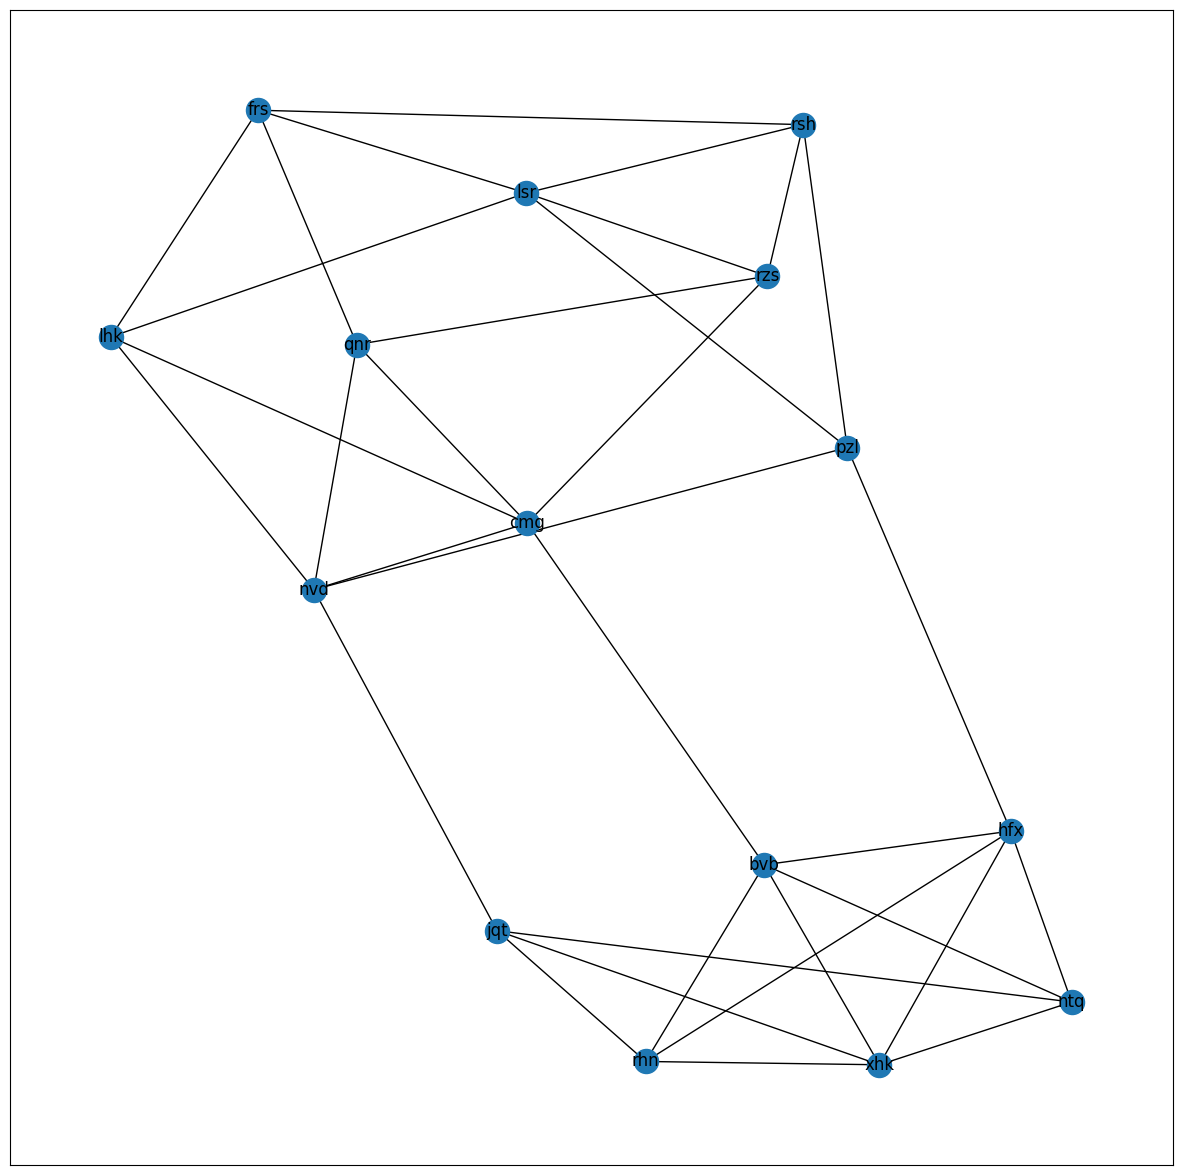

In [161]:
draw_graph(net)

Here we have a visual confirmation of the 3 edges we need to cut: pzl <-> hfx, nvd <-> jqt, cmg <-> bvb. Let's now compute the cardinality of each cluster

In [162]:
def cut_edges(net: defaultdict, *pairs) -> defaultdict:
  cut_net = net.copy()
  for edge1, edge2 in pairs:
    #print(f"{edge1=} {edge2=} {cut_net[edge1]=}")
    if edge2 in cut_net.get(edge1):
      cut_net[edge1] -= {edge2}
      assert edge2 not in cut_net[edge1]
      continue
    cut_net[edge2] -= {edge1}
    assert edge1 not in cut_net[edge2]
  return cut_net

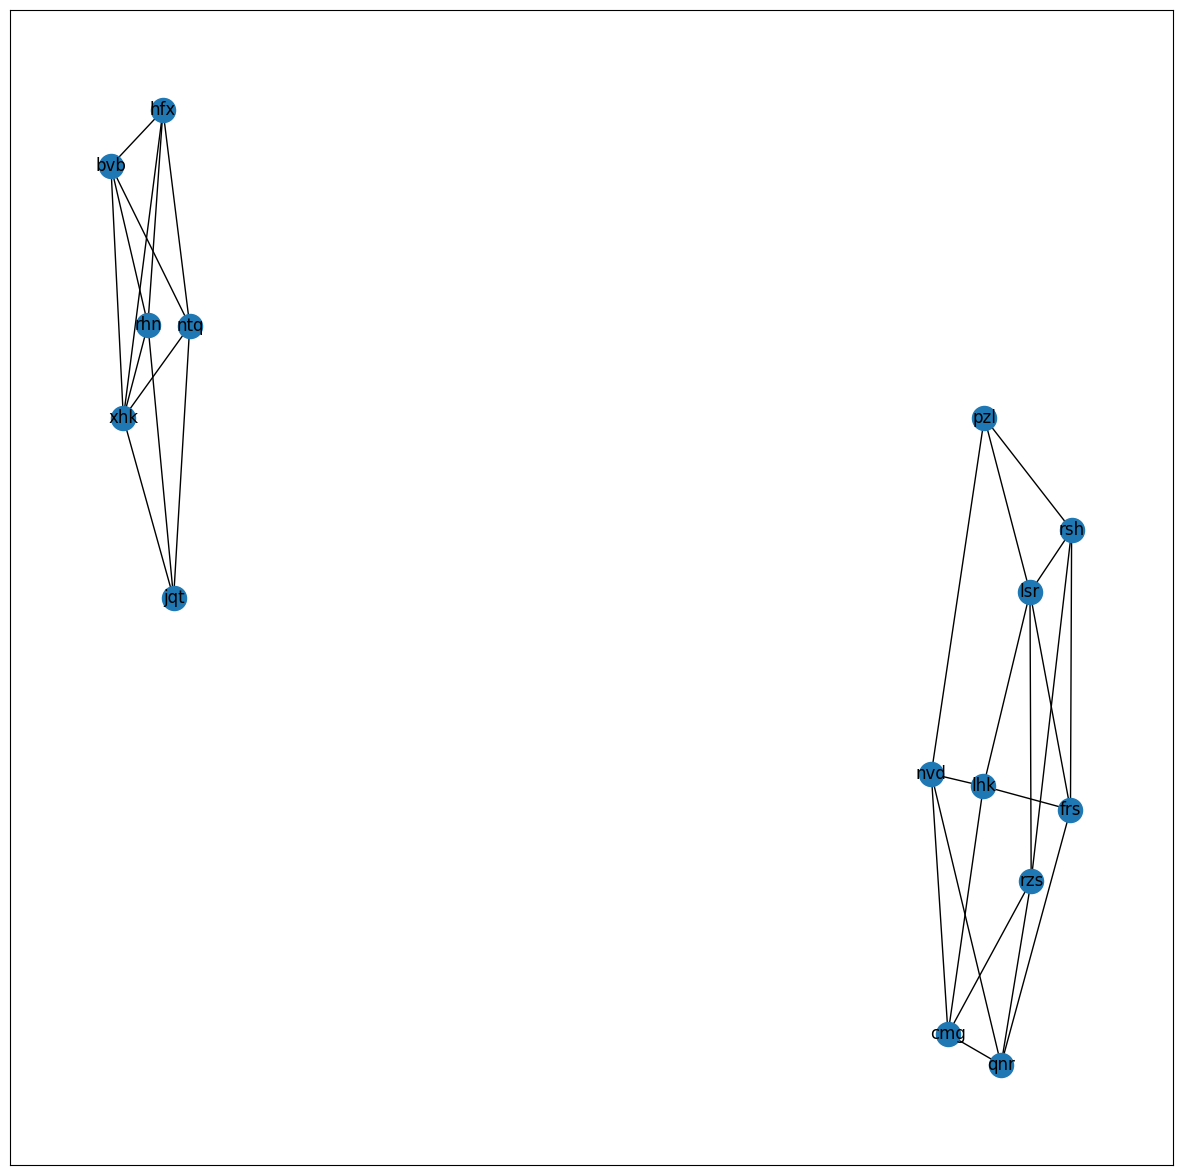

In [200]:
cut_net = cut_edges(net, ("pzl","hfx"),("nvd","jqt"),("cmg","bvb"))
draw_graph(cut_net)

In [197]:
def cluster_cardinals(net: defaultdict) -> int:
  # traverse the net from a randomly picked first node to get its cardinality
  # once done, compute cardinality of second cluster by computing difference in number of nodes

  # compute total nb of nodes
  all_nodes = set(net) # dict keys
  # now add potenitally missed nodes in dict values
  for neighs in net.values():
    all_nodes |= neighs
  total_nb_nodes = len(all_nodes)
  print(f"{total_nb_nodes=}")

  # compute cardinality of one of the two clusters
  seen = set()
  queue = {list(net)[0]}
  while queue:
    curr_node = queue.pop()
    if curr_node in seen: continue
    seen.add(curr_node)
    queue |= net[curr_node]
  current_nb_elems = len(seen)
  while True: # I realized there might be loops within the cluster populated in the 'net' dict in isolation
  # to find their nodes, I'll iterate till I find no more nodes ie till the cardinality of the cluster no longer changes
    for node, neighs in net.items():
      if seen & set(neighs) or node in seen: # this is because I did not add the connections in both directions,
        seen.add(node) # so I need to make sure I don't forget any node in the cluster
        seen |= set(neighs)
    if len(seen) == current_nb_elems:
      break
    current_nb_elems = len(seen)

  cluster1_nb = current_nb_elems

  # compute cardinality of the other cluster
  cluster2_nb = total_nb_nodes - cluster1_nb

  answer = cluster1_nb * cluster2_nb
  print(f"{answer=} {cluster1_nb=} {cluster2_nb=} {seen=}")
  return answer

In [202]:
assert cluster_cardinals(cut_net) == 54

total_nb_nodes=15
answer=54 cluster1_nb=6 cluster2_nb=9 seen={'hfx', 'xhk', 'jqt', 'bvb', 'rhn', 'ntq'}


# Solving on my input

## Input data

In [12]:
DATA="""mxp: gzz
nql: lck fxd
czg: tlf
lps: tqk bbh
lgk: bmd vss
xtd: qfg hnt qzp bfm
pgt: vpp bjk vks
sbx: sjl jbf
dhh: dnx mbz xnl htl znf
qhm: mmv xlt bqz rfj
lxz: plt vpp
snt: vsr sjq jsd
jdv: pkv fxd
pgz: qsd czn nzh xll
ndc: nzv
zgq: ptn rxq rvb kqr grk vcx
dkn: hbr xlr qpr krt
znz: hgp
xps: qqf
fpj: bzn
nzj: ztb
qxs: hnr xgx dkx fnr
rph: zjq zxb rfj
fcf: lbh ndz
lmm: thb dsv ncn jsd
cvg: xht plq
dnm: nhb scf
vjg: vdt qgr dhx
cbj: pcz
hds: rdh dzt vkr vlg
frj: grk pnz nxg zpm qkp svc
jxl: hbr krt jlz qqd
hfs: qjb bxh tcm
ntn: pbm ngr ttm bdc
zpk: php dnf brx
jth: lbh pjp
gnf: jnv vlg mjd dgx
rfv: vmf jfc mxm jjg
cnm: jvs gdc
fml: kzz gmm rdn
ftb: xph brc hbr nlg bjc
xzf: pzp
djg: zgp qcr qvb
gtj: frn zgr nfq mnv
rdh: lpn
ktl: ztj bsr gqk
jrz: pvs qzx ndz sch
srr: zmh csh bmm txl
fvl: lsn ngr
mhh: hrh
zfd: pnz cnn nnf qsp jfc
nnl: lvt mqm cbj
ptc: fhp cgr
lbm: png zzv
dxz: thn fsr rzg
hfg: jkt dtp
lvz: xgt nxt zlp
cds: lkt
ztm: qgj xrk ppn sff
xdj: fkz qmx
hzj: ldf kzq hns
htb: xqv
mhn: mdt gkh hvk dqh
vns: csh
cbz: qrz bvn xmb
zjv: hsh
xqc: hfq kxs pck cvt zvj
hbr: jdj
hkz: vgx
mqj: xxx tjr qnb nhb
hpq: ltv mzb
tjh: xgt ssf bjk vgs
jvr: nbh hlp cxb mbv
gfn: bhg xmb
mjp: rkb snt
xnd: vhd dvl lpn frn rzn
tfm: bmd szj
jjr: vxc bdn
mqm: bmd
pps: klv sbl
nbr: ptl dsp
rdc: zqk
jgj: xmp hgj jhk
dgx: vrd hpf
xdh: pnz
tzf: jcs nls kbr
dvz: cnf bdn lzj ghh flj
mgb: cgg
tdj: vls htb kkc
ddd: kkl
fqk: skm fkj jjg
rcj: csj jds vtx ljb
pck: bng zxv
xgx: chv
jns: nvk
ljb: dss zkr
bkv: rnd
tzm: qkh zbp xdj kqk
pnz: tkd
bsx: tbz kxb dsx fdf
hgj: knp
vxk: rmr lct pns nvc ttt
rzn: jxz skm
zxb: cjr ddk tkv
rht: nxt fqm mrq qcx zzk jnp
rrz: jns zxz bxs gnd
vmg: kjl
jnv: vlb xqr fds
kjs: cbq mph
hlm: bbl rgg fqm mmx
xhc: vtx vzh tfg
jhx: tvn
cgl: rzg bld
vcs: qrp bfm qlt
gfd: pls cqc fvr
rqz: tzf qzh ptc
kqj: ztb
ckx: kzk
szf: zqt ckx
zlp: xgz drz bfm
zmv: qcx xjl mph
kvx: gdc tkv nlk
ffv: mnv sjl nfq
vxc: grk lcm qbd
mfp: trv thj
gjl: rsg kqm szj
vtf: znp vsz ntg
fzs: vgx jvj
lpg: fgj ljh jvm mdt gmd cjn
pkv: fcd dtz hvv
gbr: zqx zfx rzt ddl
jsf: ltp tqc cbc mbd
cbg: rqc brk bbx
bsg: chd dsv frc pqk zqk jkv
hxb: vtv zgt vhd bdb
qjj: vvb vtv fhl ndj
bbx: zlh gqh bbl
xqv: rvp
nts: xzm csl jgs qzr dph
fdm: slt htm qsc
dfd: znt ckq ndc tpf rpq
sfk: xht drg
tpv: ftc hng pbn
ftc: bfm
sfx: kxx stt
qpr: fhs
cvt: fqt pjs
qgc: bkv ppv krj psz
khs: gmm vjh
dhx: xmd tzh
gtd: dld
qcc: xrm
xlr: qhp xxt
lkk: bzs fmf ltp rjp tmd
mkm: rnl
sjl: gqm
spl: zpm pbr
vtv: sgm hfk
hcq: cxb rhn
qrz: fkp jdc pzl
qdp: ttt bjc vbp
nhs: gvp kfn krb rbt gqj
rvb: ssj spl
jvm: zjv xll gmm qgg
gpx: jtr gbd
bxs: xcq tlf cpb
tbk: rdn
sts: mbv sjt rsq
jnj: sbt
ngn: brf kck grg xkj
bxh: mtx rcs
cmv: brx kpj dqf xrc
czq: tzf mtx bvj zqf
knt: szz zgj brr
gdt: cnl vcd
znp: hfk vmk
ghz: jkz htt rlk
qgr: cnf pjm gqh
fdf: fbd zmv dhv
prs: rdn lhz fhv
spk: jhk vzs
vnk: pbm lck
npz: hgj ssp bmb vpr
qkt: frc
qtn: jzl rfq
qrt: qnr gtm zhl ddg
hct: krt ksd jzl
rjn: gcz pmf mcs
xsb: gnz
cct: fpk gjn vls
zkl: zgp dhx vql dsx
jsk: qqd rcd mpv dnm
bmx: bvv lqn jrl
mxg: nhb pzc xpv
rtg: mpn
rjs: dvl xzf
kzq: ndc csh jpf
hdz: djj gqs
vkq: bhk zqf qjb
pvp: cgl xxq rts dxz kvx
dnl: bqt pdp ftc
fbv: bbh nbr gkz
mtv: fpk bcf pjp fvm nvk
hhp: chv mkm
rmc: cjh stt lhv sjq
jfm: kpk
gmd: qqr zhh qzn
xrj: kqj qcc pdr pvk xtt
cbc: xfj qhd
sgn: xpx tmm
ncn: hgp grp
xvn: hzt vpp pxq hkb
hmj: znz rkb kqq vls nhf
ptn: gzz fzn
txl: fdv dvm hgg
ndz: zqt zsz dnf
jdk: rnz
drj: dzl mtv vhj
vgx: jns
nzh: jzs
zlh: fdm ssj
zqs: csh hhh zvj dtz
hvk: gqd
rvc: hbp
pvx: mmv
ksj: xxq qvh dzs gcf
slz: qhd
dcb: bxh rkl
gzq: bgz hrr xvs
vcn: xmb ftq
prf: xtb
czs: frp kxh xxh
xmv: dml gjn tld crl
xht: sxc
bbl: bfz dhk
hcv: tbq xlr pdb gbn
pls: fdc
bgz: bkv
qjz: rlp khs rzb fcr
zqc: rjs cvt vqm rpb
jdn: nql dtz gqm mkm
tmd: zkk gjt
fdd: nzh bbm vxx
qtx: jhx mrl vcx hbb dqm
jhc: ljd hfk rfj
jvd: hpf
zlf: gqk bvt pls zch
fhk: zfs qlm ttt bvj
vmh: prm xlr qtb tsp tsv
drh: jzl nck qlm
vpc: dmk lqd vxx rsq jcs hfx
bfx: nqb mbf
gmq: kst jdc cpk qhz
fhl: qcr fdm rjz
jxf: zpm gqh fbj
qtb: hct vzs
fvm: jdj fck rmb
nvm: zsf snt kpk jlv
zhh: qtn
mkk: pzc jnj
pkn: mtg sjt
gbd: zgr vkr kxh
svs: nnm qvc jvd
lks: bzn
mjm: cnl rrl pvh nfh
qnr: vnt
vgt: tsv ltp pqq
gfr: fnr drg hfg qkx qps
zgg: tvt dhv
gdv: pll cgz qvc nxg
gbn: ndz pnq
hzt: jqp dfx xxh
tzt: sbt rkl qqr kmm
pbj: nzf rdh
klv: knd hkz
grd: kqm pnv gqd
bcf: cqf
fnr: ppv pqd mfp
jnf: vsz jbf
fbl: zlf lfr plt jkt
ncv: fmn xlk nhf pvh
xhp: cgg zzv
cjr: vqb tgb
rkl: ljm
ssp: bcf
nxc: pzc
jjc: nzf
tlg: mgk zlt qkr
crf: bkb pbn rzv qzr kmd
qgp: qfm rnl
ftt: kdr ghh lzj tmm fqt
zfx: zts grd
jqp: ndj kmd
chv: sbx pcf
kvt: bsr jds vpp
vdt: cgz
lsn: xgt
rdn: mtg
bqt: cjr pdp ztj rrv
dgp: pkn xgv bjp hbr
nct: tzt pxp qcc
ztj: dhv nkm
bzq: qmv dtz tcp cpg
qls: gdc sxc sgj kzh
zsv: pjs zxh rfn
ndk: vjt vmg pjz ptc
vjb: fvr xvs scc
kfn: rzb xmj fbx
tkv: tzh
pmb: mtx pnv tbk bzs fzs
qbk: dds rfk
xcs: hqj pdr vcd sts
nkx: mtg rqx
stt: rmv rkl xmj cgr kvz
hmg: pdp tcp npk
flt: rgg rvh ppn cvg
ddg: svt mzt
pzz: hjb mkk rjp
mqp: cds npk rpv
hqt: qqr cjn pnq fmf rtd
pfs: cps xbg
hrr: ncr csj
zjq: ppp kzh skm bds
pvh: tmh
kgv: bvt tpd
xqr: hpx bld
hqh: lqt qxt vjb qls pgt
shq: lnc gqj qtb
ggr: cct gjm qpn cxt
mnf: kpk xtt ncn lks ljf
hpk: sxc tpf
jxc: cqj dnj rgd nnj
bvj: frc
ddb: hfk qrp ftn xml vdt
fph: mrv rzn
jbf: kkp
dss: cln ndc xxh
sck: hzg nzj xth
dqh: ksf gzm jfm
dvl: qkf
ffj: dhd zbk bsl ndl
pbq: ntv htk mtg mqm shq
vzb: cqz vpr tcr gtv vjr
xkj: xrc qzh
khn: vxl dvl frn
xpv: dnb gzm
xxx: hbl ptc ddl
klj: pmk hng jht tzh
vnm: dnm hbh htb hbr
rft: vnk mkm zlh thn
rgp: rfj hfk qzp
cfj: pcs pjt gcf spl
jkv: tjc tsv gzd
hzd: dsp bjp hrq
fsh: mmv ktn znp
fkg: bkg ghh dsj mjd
tnh: zkk bbm pxp
gkh: qqd xqv cjh
qfc: dnx xcd ksc fxd
rvp: szz hkd qhp hrh
kmk: ncr rkd gqk qfm
pxj: kqk kvz
jjm: jlz htf
brk: rxr
bdc: qkd psz hng
xzm: xvc qzd
msj: fmn zdc knp rjp
flf: lmc tvn kcv sct
mrq: vnt vtx
xsv: dbp lks xth lvt
zlt: vcv qbk kxh
frr: nts cqj dgx nqb
qll: zkr thn mbz rtg
cjd: kck ttr knd pnv
grg: hnc hbk
gxj: xtk dmk
csl: rnt ljd
lqt: bfm njc
lpv: sxn kck
xhd: cxb mrz sbl nkt nkx
shj: ckz tmd mhd thg png ssp
csz: sxc bsl qgp
vhf: cnl lvf qpn jjs
vcv: dgs lcm cfx
brc: kvz czh gjt
hrq: fpj jdf
pmv: ncv tvx gbr thg
knl: vkq hfs
xjl: zbk mpn mrv
qzh: qsd ljm jzs
rld: rcs gxn gjl jrx
rmb: rnz
vdp: vjd qkd
svt: fdc tvn
xmp: chd fgj
dds: jbf qzp
zcv: xmp vcr zts
pdp: ktl mrv
bmb: gkz
jds: tbd
fxj: cqq slt skc gnz
pgs: znf
fdb: zgt vdt mrl cpp gfx
fkp: dsj bnz vnn
kqr: pbm kst
fjg: jxz qmv zpr
zqv: pcz tqc rrz knd
cvv: cpg jnp qkp zxm qkl jzv
vkd: tzl mtb cnm jnp rjz
hbp: szz
vjr: htf xzc
zvd: dml rsk gbn zvh
pbc: czn jlv bnx cbc
qlm: cxf
hnr: pcj txl qgc
tps: dml dvs rvc zth lhv
nvc: xth
cnl: rsg
pdb: jlv bnx
lsm: ckz qjb zqt
vss: pfz
rlx: vlb xgn gkb bhg
bvv: rkb znd pxf
flq: xqv jmj lhv
rlv: ffv pft xvc hth lzj
lfs: ndc qzp
xgv: gjn ttx vgt
grq: jqp csj tsk nkm
zcj: tjq bcg
vcr: lbm brr
pnq: dcb
mpq: qfv ljc svr dss bfx slb
vlx: hpx rnd hdl
zvr: qvb fsr mxh cpg
tfg: bhb
dzs: rjz mxp
pbn: gqm
png: rmv
lrn: vcd cqf
xmb: pfs
dnj: bdb
shm: qkf ftz bjd dnj
nnm: hdz
drg: qbd qzr
fzn: cpp
nzm: kdr xjn fjg zch
llv: zgj
ssv: rrr ppp
ddq: ttt fhs csr
qkl: xfb sgm njc
mhk: zfx blg kqj
nfq: ltv cpk
rmh: ndl kzh krm zdf qhz
czh: xjq
rgb: qnr xvs
xlm: gqs mct vlg
vcx: xgn xsb
kzh: tbd
dfx: qnr ljd hzl
cfs: bzh dzl
fvr: trv czs hhz
hmk: sgf hth
fks: kfn ljf ssl
tfb: tkb
rxb: vxl zgr tzl
fxt: qmv htm qfv ftt
vmf: fbj kgd
mpv: pvk
ksc: xzf
xlt: hmk
lgq: ltp fhp fzs
tfc: qkh mqm chd szj cfp
zkk: gmm vjt sxn
qgg: cgr rlk
cxt: spr
vpd: gjm nbr hvl gtv
gmt: thg vls dvs knt
kvn: tqt
hzm: jcs
tbq: znz
vxz: pfz rsq hrq qnz
zrs: hss hbp tvx
pff: gzd tfm
jhv: krz cfp
cjt: tkf jhx fkj
lrh: sbl cxf rtr
jkz: tmh jhk
hkn: xbj krb fkr zgj
kmd: dtp
cnr: vtf qvh tvt pxq
tvx: qqf
xnl: xmb tct vqb
hkb: qsp pft hth pbr
qxf: zgg hns gfd
mdh: tsv
nzf: rpb
jpm: fxg xvc csl bjk ssx
clr: fcr spk szz
krm: hvv
hjp: dnx fpn rpv lpn klj
slb: xns qsp qzp
tsp: qqr hcq
zmh: jvd drg
ctm: qkh gng
shc: csj
vzv: cbq zdf dss mph
rfn: vqm mmx qbk
cqz: cxt gzn
sqm: lct bpt
vrd: qfm
dkx: cpp
plt: ddm mct pnp
cbn: lcn
lmc: tgb
xbj: zzv rkl pkn
xnt: lsn kxb dkx ghg
vtp: cpb
pjz: vss
fzl: jjr djg sgn nsv mgk
skd: svr xmq
mbz: nlk csh
dcx: csz chr pqp
tdz: jmj xrl hvk
cdc: hfq bfd lhx gzq
qkr: jvc
nfk: mtb
grf: bnx ljh mgb grp
cpb: bmd lct
dtr: kzz
vhp: cps
hxz: cbz hpf ltv rvb
lcq: qjj jjr xlm lcn
xlc: jgs pbj gms cnf
gtg: sch fmj qjb mqr jsf
bmm: zbk nfk klc kgv
djm: tfb pvx dgs
tbd: ddk
pvs: skn nvc
sbt: sfh
fmf: fff
cqc: rxr xsb
fxg: jfx kqr
dbp: czg zjv qpx
ptr: sfh bzx nvl pvh
bxm: pgf pvx vgv qzd
zxv: pbm xrh
gtm: lpn qgc pht vnk
sdn: htl rfk vnn
gdf: fpj pfz
sgc: ndl tfg
pnv: lhv llv
pzh: vmg zxz
jfc: pjs lfs
qsc: zch
sxn: thg
mxt: rgb tkd qrz ddk
rpv: npk
mdt: sbl
khp: grg hfx sjt qhp
fst: qdp xgd lkc nvk jlv
zxz: rfq
ntg: hdl vmf
cjl: dld lkk jnq tcr trn jkz
gms: gzz vdp hhp
bbm: kzz
tts: lch nfk pck vqm llg pmk
nsv: bld qfg txs ntg frp
tmm: xmq
rkd: qzr
lqd: gjl ckx sqm
jvs: fpg
kxx: xrl mgb sjq
vxp: ndj dhd kst
cgr: kjl
hld: tbk rbt
gcc: gdf mkk vlv rnz jlz
lhk: dtr gmm ptc brf
tjc: mhh mhd bjp
xns: nkm lcn
cnj: xxh pbn qhm
ncr: ckq tgb
zqx: xpv mqr tdj
scc: fph hzj mrv hvv
gsb: cgl gqh jtr zzk cfd
lqj: dnb kbr fkz
qps: bfd qfv gfn
tdx: mpn mzt nxd chr
zhl: krm vhp
plq: jvc
fsc: jbn bdb bzq xtb
btj: vks tkb xzf tnl vhp
jdc: kcv xvc tfb
tdt: xjq bcf hbr
fqm: rpv mxh qvh
rtn: hld gnm lvf vhj nzr
sqp: fcp tlf fbv lrh sch
qnq: ptn vrd pgf rzg fdc
bfq: brk mxm
nrv: mqf xgx mbf lqt qkf grx
dgz: lqg jrl sqm hss gtd
ttc: pqq hrh zjv rfq
nqb: dvm jpf
cgg: hfx
xjd: djm fsh tzl bfz kgd
zhc: hgp gzn mdt fkz
bkg: hth xlt kgv qfg
gdz: pjz qct qzn
dmz: rbt nbh mxg
bfz: zch
fbj: xtb
fsf: kjs hbb hmk hzl
bfn: zfs tjq
mkn: spk lgk
sjq: xbd nkt
shp: ngs dds ftc rfk
bbn: hss sjt nxc
fcr: dtr nfh
ttr: gzm rmr
bng: sgm
mbs: bgz jhx lhx
tct: zgt hdz rvh
cnf: nfk
qkv: dxn kkl fzs
btz: jjs
vbr: hss mdt prm
sqb: vcn vjd khn tsk cbn
pzm: tfm tjq kml kkl
jrx: rtr gkz tdz
fcp: ggr tqc tbq
hss: pxn
xrk: dtp
btn: vbp dld rhf xrl
dml: qzn pcz qhd lqn
hcz: cnm pzl flf ckq
hjb: bhd xhp pxp dld
dzt: ndl mjl
zjh: hfx pcz
rbk: zdf gdc kxp shg
cfd: qbk sjl pck
xzn: jqr xrk xht xbg
gkb: cgz pnz xpx
fbd: thn rzn cnn
zxc: hmg prf dtv jdv
qzz: dnf ckc bpt fff lnc
nxd: djj pll fdc
pxf: gzd
tbh: tqc
ndj: lsn
bjc: gqj
pqp: hng xgz
tmh: hlp
dcp: vvd ssj zpr njc
njr: ttx flq bmx drj
znf: sgj rnl
mmv: cnn
dgv: jjm ngn pxp ccx
thm: tqk jzl mpv sqm bvv cpm
kqk: qhp rcs
drl: gjt ddq vcr gkk
mxl: fdd spr jgj qsk
mlb: xgz
szj: fmj
zxm: fzn pgt gqh
bvt: mzt drz
fmn: rhn pxj
gsj: cgg tcm fpj bbh
jqt: xlk lcl plh vsr
skc: dnl mbs gpg pbj
tkp: gzn hvk
dhd: rnt
fsv: lps ppm jth kqq xtk sfx
xfk: jdk qmr nxj lgq scf sfx tkp vjr
gnd: mkk qpn hfs
pnp: tkv tkb rpq
frh: nxj fhs rmv
xpx: rnt
dtn: sfh vgx pnq dsv
kpj: bmb ttr lps jvr
mzh: kvq kkm sck xcs gdt
cfp: brr zqt
xkr: rsk xzc lvb nzr lms
kbr: lrn
dlx: ckc drh xgd ssl
hfb: sgc kjz shc fht
dsv: kpz ksf
rhf: ckz
khf: qlm bhk
zvh: jnj zfs
rjp: krt xxt rsg
pxq: pfc gpx
ldf: rvh rjs
jmk: xtb dtp rpq
gtv: fhs jdj znz
hql: vxz btz pjz mgb
bjf: vns pvx
czn: hvk
cdb: pzz vbp szg
kss: njr fmn nbf lrn
jzp: vgx fvc rqs rdc
hzl: cps bqz qcr
rqx: jvj mtx ksf
pzc: fgj
dxn: knd zgj
qnd: dsx mbk ftz fpn vsz
htp: nbf bhd nls fbx
rhn: nzh
vgk: scf stf qjb dml
brf: hkz kmm
htf: jnj
ddz: rdb xgt tzl zgr
jgx: xbd hgt dqf
pmp: tgb
tbz: cdc qcx sgj
tpd: hvv
vnn: qkf bng
ztn: qgc jjc bdn cps vqc
tjq: jmj
pcs: zgt
pvk: qlm khf rsk
qgj: cfx xrh vzv
ffr: rnl mzb rph hpx
fck: mjp nxc qgg
dzf: pmp
nhb: czh
qkh: zcj
hhz: mmx mrq fpg
pht: xgx dzs
jrl: hbp hph
sct: ljc
vfl: tkv tcp cbq rnt
klc: pcf bds tvt
ljf: rhn dnb
vqc: dqm
rsq: jfm
gtp: bhg bfq
pnl: dnb rmr cxf
dph: sxc fvl jhx
vbp: fmj
hjs: qct zpk mtx hbk
fbr: bbm mdh rtr
bzs: vjr
dsj: ngr
grx: ggt mmv
kck: vsr
snm: lkt flj dvl ltv
tcn: jzs cdb mkn qhd mhd frh mjp
glp: mct nhn lsn
mbl: frp sgf xrk
kzz: ztb
nbh: xzc
sbr: jvl bkg nkm vns dtf
btv: dck jjc kst xxq gtj
jbz: zgp rgp gvr kmd pgs dzf
qhz: pft lch pfs
nkt: fmj
gqm: npk
jnq: mqr xzc nlg
qsk: slz dnb
thb: tcr ztb
qmv: mlb
xrm: qhd
vxl: mxm
xvk: bnz dgx fqt nrx
kqq: hcq kpz
lms: lct lbh
ldt: thj jxq fbj
zvj: lxz rvb
gjm: ssl bfn
zdf: qcx rdb tzl
lnc: qsd zdc
bjp: ppm
nlk: vnt
tnq: nnm ttm xcd
svc: lkt bvt
rzm: sff vgv mcq vqc
ltv: nrx ttm
cjn: bhd xfj
zvn: qsp vqb hfq jvl
jnp: ssf
vjh: xxt tjq
sdv: pdb ddd kmm nvk tdt
qkx: jvs
mbk: fmf vhf lsk pzh
fkn: ldt vcv pbr cpk
hnt: shg mrl cqc
zgp: cjt
pll: sgm
lkc: hbr bpt fhv
vpf: zvc gmm pnq djh
znt: zlt xml mzs
zkt: rgd bfx qvh tvt
ghd: rfq hld lcx gdz
zxx: hhp kcv zns
lzs: ffj plq zsv htm
qfv: kkp
hxv: bdn zch htm vxl
psz: mrv
hnp: mxp tfg jvd vmf
mzb: bld xns dds
zjk: rvh dds gtp dnj
gcf: rgg hpq
kjz: bds xmq tfg
rqs: llv zhr xmj zcj
sff: nzv nrx
kvq: tbh zts jcs kmm
sgf: kbb nrx
ssf: rkd ldt
knp: vrx pxn kvz
dmk: hgj zgj
ppn: rkd
rfs: lpv lgk vgb
mbf: brk htl
xgn: cqc qvb
zqb: dzl tbh vjt tmf
rrx: vcs prf zlt pcj zxv
grp: nkt gxn
crl: qmx
zns: nxt qvc xfb
dxf: lks thb
bzx: gdf hnq
rsk: jvj
xlk: plh jzl ckz fbx
slq: hpk pbr
cpm: dtr fgj tvx
ttx: pbc hzm btz
dsx: lvz
vvb: fph rtg hng jdv
xmd: cgl xpx rgb
dgs: qsc
ftq: dhk bjf gzs
mbd: cgg zhr
nzg: xjq vcr tnh hqj
mqf: zns vhd gbd
zhr: rhn gzd
lbt: lbh rhf tbq hvk
pjt: mlb jds pbn dcx
rfr: tqc xkj bjc qkt
rsr: nzg ntv srv tqb
qqz: nxd jnf fpn fxd
dhc: xbd sck zrs php
gxn: vjt
nff: slz jrx ghs hss
hmv: fdf cbz mxm ssx vlg
jhf: czn htf dxf qpr
trv: hdz
flj: bng sbx hdz kbb qkp
tpf: vsz dhk
ppm: rkb
qnz: hzg slz gxn
kdr: rpb qbd svd
nzr: rvp nlg
hvc: vbr zcv gdt prs qnl
dmp: kjl jfm brx zth
bpt: hnc
sjv: jhx gvr dtp qvb
jfx: rjz nhn
qfh: vkk dzl php
ljz: vvx pnb kpk qtn
prv: vgb bhk pvs jth rqz
sdh: thn zgg pqp qcr
vlv: jns tmh pvz
pnb: kkc xph
gkk: htt mhh tcr csr
ssx: pls
lsk: jdj tqb rmb
lqg: rjj spr fhv
fcs: llv pqk vtp
vgv: sfk qgc
mxh: bnz ztj
thj: qcx xml
rzt: brc pff
bjk: pzl
rzv: pfc gqs
grc: zsz hzd rkl ztz
ggt: mpn bqz
mcq: hpk tvn
kzk: ttt gqj
dnf: gjf
rqc: pzp skd
rjb: xdj vtp knl
rxq: dds pnz
tgv: hrh fzs gtd
znd: fff lbh tvx
kkm: rmr mdh hcq
nxj: qqf
ngs: hpx
hph: hbp fvc
llg: fdc jqp mzs
llf: scf qmx rcs
bfd: gtp cvg
tsk: dnx xml
mnv: tpf zhl
nhf: vss kpz
rrr: mzt kkp
fsr: skd bfz vxp
xgd: gjn
hpv: qxf lcn dkx lfs thn
xvr: rzt hkd llf cqf
dtp: tpd
lcm: dqm
vqb: fqt bnz flf
hnq: fpj szg bvj
rdb: gqh vjd
nxg: tkd
fpn: pmp
rrv: qzd rpb
mmx: vpp
lcx: hfx dxf lsm
lch: qvc
djj: qrp tkd
kgd: slq
frc: bcf
lhv: rtr
vmk: tkf mct txs
mjl: kjs tsk
rts: ffj lfr
sdz: qzd pgs ghg sfk
dvs: cbx gzm
ljh: xfj
qnl: fhp hbk qph stt
kns: vtp qsk vhj kvn zhh
xsl: ktl rrv pgf fqk zmh xsb
xvs: qkr vlb krj
spg: zst krj mfp cdp
rcv: tqk gjk pxn frc
nck: htf rfs nxc
qqd: jvj
ksg: jxz mpx lkt bsl
ghs: vhf kph stf
ktn: cgz
mdz: knl pxp dxf
mgs: fml xjq tsp
phk: mdt plh
cqq: rnd kbb xxq
gfx: cbn zxx jvc
jxq: mjl tfb mtb
slt: mxm pcs
ccx: xfj bzh
qlt: klc bfq ksc
fbx: jmj
zdc: jvr vsr pqq
zkd: pzh htt lvb tnh
mph: nnm
pfd: ljh png xdj gjk
zsf: nvk jsd dml
hdl: htl
gjk: tcr bnx mrz xjt
vts: fqm hpf hdl ljc
ckv: zjh qjb cxf qkh
hzg: gzn clr tcm
hqj: lbm
tcp: prf bsl bfz kxp
pft: zbk lcm
bds: vhd
cbx: hsh bzh tcm
rzg: bdb ngr
gvr: tmm svr frp
vgs: fpn fqm cds
fkr: ssl php xps
lzx: kst qgc dhk jkt
bbh: dsp
fdv: jxf sgj
pfc: fvl pll szn xjn
vpr: hbp ksd
hgt: fhs bxh vgx
trg: chr ktl hds vpn
jlz: cjh gjf
lpl: cps dfx rvh
kbn: zhl chr ssv xdh
prm: jdj szg
qpt: ptl cbx kph
pns: krb pxn mpv
lqn: kvn
bkb: qfm hvv
ppp: zmv jds
mmn: rts vcn xrh svd dzf
mtb: nzv
ppv: bvt hfg jvl
gjt: gmm
rbt: qpn
cqk: xmq qxt xvk cds vlx
pjm: nhn qkd bjf cps
mcs: pjs jhc slq
sms: szj gxj lms vrx gvp
dbc: cbj jjs bzn jhv
zts: xrm
pfn: nql jpf ssv jnf
plh: znz tlf
ftz: krm ngs rrr vjd
vmb: cfx krm fzn
ptl: fhv
vpn: vhp hbb fbj
hhh: xsb rtg mxh
gcz: mrl xgt
lhz: fvc mdh fpk
pqk: rfq hvl xph
xrc: hnc
gng: cjn knp zzv
cdp: kcv bkv ljb
cpk: lxz tpv
gnm: vcd rvc qkt ckc pvk
tnl: bkb cpg fxg
nbf: qjb spr pff
rrl: pcs xll ddd nct rcd
qzx: jdk fff lkc
frn: gcz
cln: trv
nlg: xth
ghk: vrx xhp jzs
ghq: ptl lsm qhr
ksf: bzn
ddv: ssj lck kgv zns
rlq: pzp dzs cnj rjn pzl rgg
xbf: rzb qph lhz tgv
mpx: rpq psz tnq
rnz: xfj
mbc: rtd hph vmg lmm
gpg: kkp dgs gfd jvd
vzh: qgp gmq lsn
vhh: qkp vks bsl
jht: drz pqp
mjd: kxp rnd
rlp: pff sts khp
krb: gxj dzl
qpx: fbr mqm
dck: vks bjf kxh
hgg: pzp
pjp: cqf
ckc: qcc
mck: szf phk fcs tsp
fds: xfb jvl sct vnt
bjd: sgj rdh ktn
zvc: ljm jlv mrz sfh xtk
hsh: szg czg kpk
jqr: xqr cnm pht
hns: svs xzm mcq
kxs: tlg nnm pgs
pqq: jjs
sjm: gnz bjf plq tkv glp
tgs: tkf rrr mxp
skn: xbd bcg zth lbm ksd
ddt: sjl rxb prf rqc
lvb: jjs szf
zth: crl pxf
xcq: cbc xrc nxj
gxx: ftq ptn sdn xdh cbn
hbh: mkk ndz jhv
xmm: xjt fdd xmp ndz
rcd: tqt bxh pnl bjc
vvd: jgs nnm ssx
lhx: grk
vkk: dcb nzj vss nhb
vvr: shc qkr vhh pck
szn: qvh zlf
svd: xgz
rsg: zfs qsd fvc
vml: qhz hrr pmk ztj
lvf: nfh mhh kpz
zdv: qbd ljd jjr vtv
skk: tbk pnb gqd fvm pxj
bct: qfh xps jjs bfn
djh: zxz xbf qkt
tjr: xrl qkv rzb ghq lks
pmk: ghh
dcj: dqm dhd svt hfq
blg: krt gtd
pcj: vns
nvl: nkx kkl cjh
jrc: mqp qgc qgr dgx krm mzs
cpp: qkx tkb
rlk: dsp nfh
hmd: qhr sck jvm trn
fmc: qct jjs bhd
fpg: zpr
pcf: vqm tzh
zzk: pht sbx flf
nnf: jzv jvc cjt
dpb: cqc hgg tnq drg
kph: nvk htt
gvp: rdc sch pps
tqb: fhp
ghg: rxq mbl
ftn: kgd gzs fdv
frl: hzm vjh qqd bhk
nnj: vql rfk ngs
nhn: fpg
cqj: gcf fsf xjn
dvm: cbq vhp
qph: zqk lnc
qmr: czg ssp
lbk: mgk svd ggt
jgs: pmp dzf
pmf: kvx vqb pnp
bfm: ckq
vlb: jkt
stf: kpz bfn hzg bzx
mbv: tdz
hfj: qtb hrh tmh czn
xsg: hbb jmk zns ksc
btt: xtk tqt ckx pvz rmb rvc
lzj: svr
rgd: szn lch lmc jvs
tld: hqj nzh qzn
xjn: ttm
shg: cln gfn gzz jmk
vvx: jjs czh gzd
jbn: nnf spl pcj
npv: ljh zvh fpk xgd gqd
pks: lqn btn gjf mbd
kxb: vqc nzf djj
bsr: mxm
fht: zpr qfg
kqm: ssp mhd
lvt: xxt
vhj: lvf
gzs: bhg fkj nzv
qxt: sct jjc vkr
scn: mdz pqq fmj qpx
rjj: dxn lct tjq
pqd: vqm xrh
dzd: ldf txs vjg gpx lgd
kkc: kjl xmp
bqb: vxx hvk nzj chd
ksk: jdk bzs ghz xps fcf
ndl: lhx
nls: cfs kvn
lcn: qsc mmv
cnk: gdf jvj gkh zgj
xjq: hnc
dtf: cln shc xlt lfr sgn
ntv: htb fvc
lfr: fht zlh
jpf: xrh
zjm: mhk btz nbh cxb dmz
dqf: zfs fmc
htk: xqv rmb khs
tmf: kjl tqt jnj jhk
mqr: vgb lvt qqd
cfx: qgp ljd
vzs: pxp
fkj: gqs
zsz: kzk tqk tsp
ssn: mxp xhc htm xrh lmc
xtt: qct phk
xhn: hkd vhj pjp tkp
krz: pfz hlp crl
srv: qqf sbt qhp
hvl: bmb cxf klv
zkr: bqz nlk
zmp: shj hgp mgs fks
xjt: tmh pvz
zxh: xdh kxp mmv sff
ddm: ddk tvt rxr
bcg: vrx tbh
jxz: dhk
stp: qpx xph hkz jcs rdc
xbg: zpm qkd
pgf: pqd
nxt: bsr rxr
brr: vjt
hbl: gjf ppm xhp mgb
xcd: tpd jzv tcp
lck: vtx tbd
dhv: kbb
zkh: hxb cbg rzv txs
zst: hkb ksc mjl
jtr: cnn
nbs: fcr xrm cxt qzh pps
jsd: khf
csr: ctm nls
zqf: qpr ksd
fcd: njc ktn xzm
zkm: kbr zpk bbn vgb
vql: sgc tkf svc
kfv: jht lbk tgs frj
dlr: bgz grx tzl vmb hpq
zbp: nvc blg kqj
htg: pxn bzh jjm ckc
skm: xrk mlb
sxc: gnz
lgd: nzv vmk qrp
ztz: pxf ddd mrz
jdf: xmj gzm mbv
zqk: vzs
vsr: gzd
tfr: dsj qkx bhb dzt jfx ppn lpl
pdr: zhh knp
qdr: drz bzq pll bmm gqk
qgb: rmv cqz vhj pmb fcf
qhr: ljm tqb nnl
ddl: lcm kkl
zgj: pvz hkd
tsx: mkn qmr vnm ghk
brx: fkz zjh ttt
jbh: ddg hgg mzs dgx krj vdp
qfg: ljc
trn: hzm cbj
cdz: xll qpt rrl bfn jgx
jzx: qjb dsp vbp qmx vxx
bhb: zlf jzv jtr
dtv: kvt vkr hhp
bvn: nxg dhd ndc vrd
jjg: hth mgk
qnb: gkz tbk tfm
gdr: ctm hqt hbk rjb
kml: lqj sxn spr
xxq: nnm xfb
lcl: pxf hlp ccx
rtd: cfs lpv rhf
"""

## Solving

found 1209


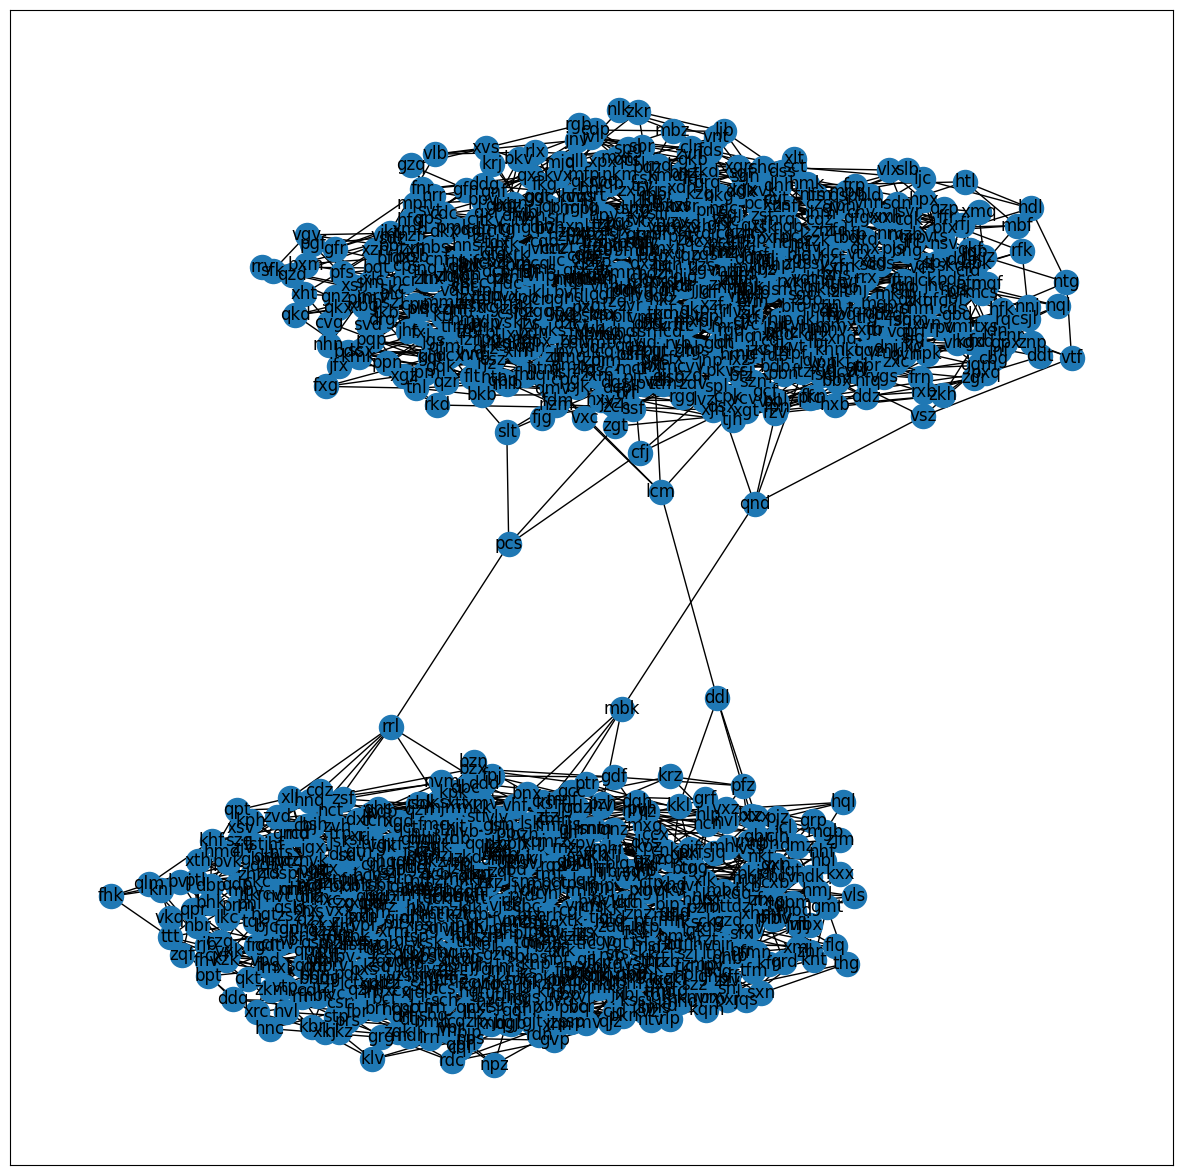

In [203]:
net = process_input(DATA)
draw_graph(net)

In [113]:
print(net['ddl'], net['pcs'], net['qnd'], net['mbk'], net['rrl'])

['lcm', 'kkl'] ['zgt'] ['dsx', 'mbk', 'ftz', 'fpn', 'vsz'] ['fmf', 'vhf', 'lsk', 'pzh'] ['pcs', 'xll', 'ddd', 'nct', 'rcd']


rrl,pcs,ddl,lcm,mbk,qnd
[('rrl', 'pcs'), ('ddl', 'lcm'), ('mbk', 'qnd')]


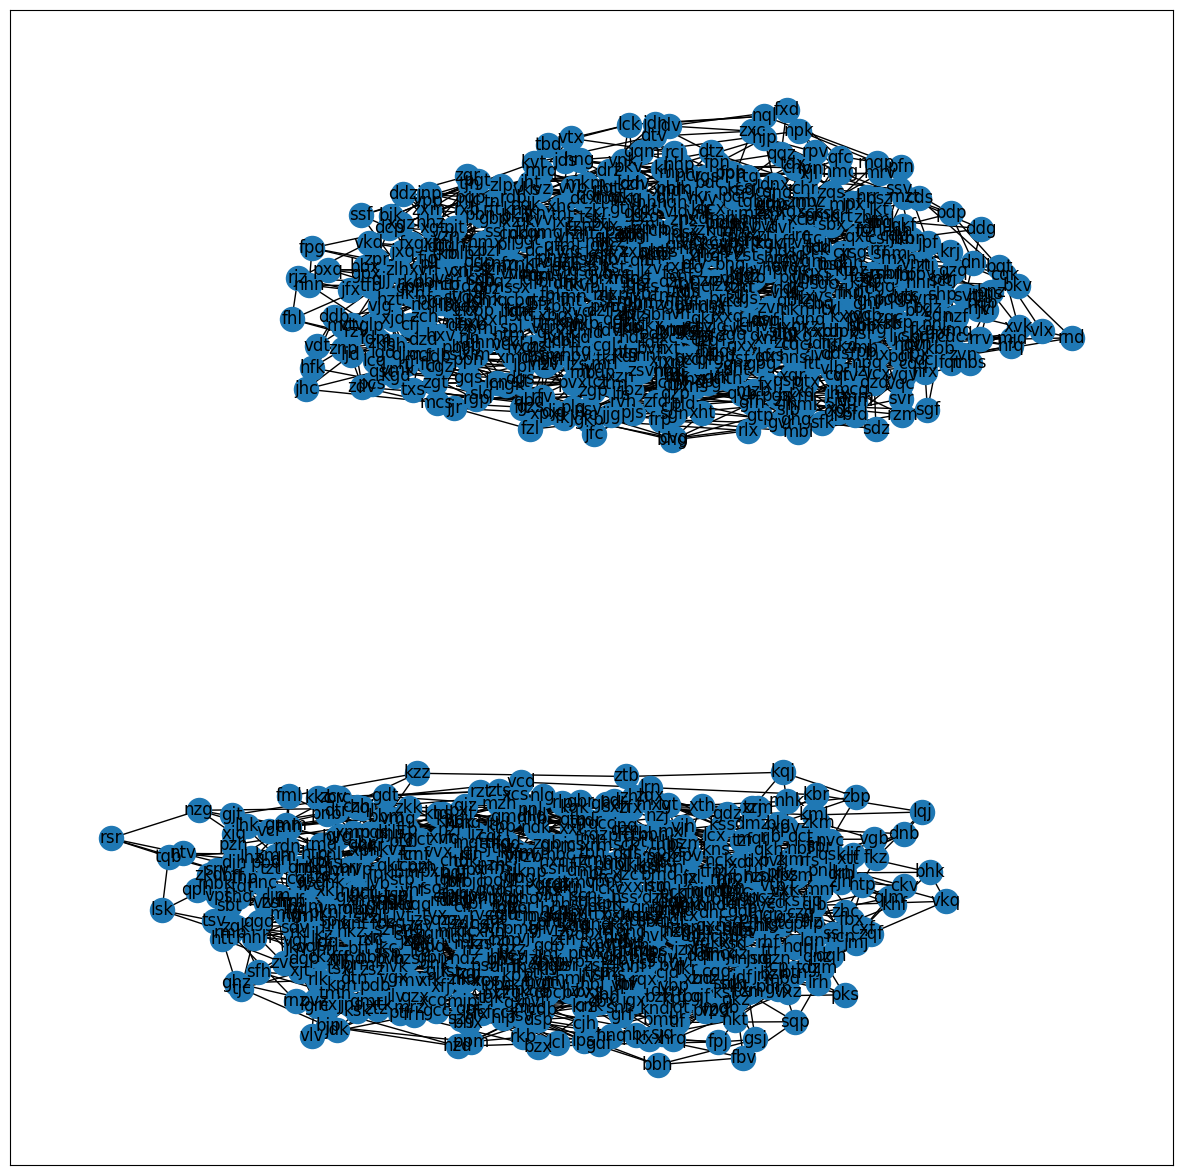

In [204]:
to_cut = input() # type 6 nodes to cut, comma-separated
nodes = [node.strip() for node in to_cut.split(',')]
nodes = [(nodes[i], nodes[i+1]) for i in range(0,len(nodes),2)]
print(nodes)
cut_net = cut_edges(net, *nodes)
draw_graph(cut_net)

In [205]:
cluster_cardinals(cut_net)

total_nb_nodes=1484
answer=550080 cluster1_nb=764 cluster2_nb=720 seen={'gfn', 'bsx', 'cqq', 'gzz', 'tlg', 'qkp', 'rxq', 'krm', 'dcp', 'rbk', 'mrl', 'sjv', 'zqs', 'fsc', 'zch', 'vqc', 'ftn', 'mrv', 'ndj', 'tpd', 'jtr', 'rgd', 'crf', 'pll', 'fzl', 'nlk', 'zkl', 'xxh', 'sbr', 'lxz', 'bhg', 'zvj', 'rnt', 'jnv', 'lbk', 'gqk', 'dhh', 'bfd', 'klc', 'fxg', 'fsh', 'sdn', 'ddb', 'tmm', 'qzr', 'plq', 'vzv', 'rjn', 'mzb', 'zgg', 'vtf', 'dvz', 'fhl', 'bvt', 'frp', 'xcd', 'slq', 'lgd', 'hdz', 'btj', 'fpn', 'cnj', 'nnf', 'rvh', 'qps', 'fph', 'ddv', 'dds', 'mtb', 'sct', 'dhd', 'vvd', 'drg', 'cpk', 'ssv', 'gqs', 'hjp', 'cdc', 'tzl', 'fvl', 'gms', 'dcx', 'pqd', 'qrp', 'nnm', 'kmd', 'llg', 'pkv', 'svc', 'jjc', 'vpp', 'csl', 'tcp', 'jvc', 'hxz', 'qsc', 'djm', 'vcs', 'tnl', 'zlh', 'rdh', 'kdr', 'xbg', 'zlf', 'vjd', 'cnr', 'cfj', 'vtv', 'rzg', 'sdz', 'zjk', 'ksg', 'rgg', 'dvl', 'tbd', 'ghg', 'qtx', 'jdc', 'szn', 'qbd', 'vgv', 'jdv', 'ggt', 'flt', 'qbk', 'ppp', 'tsk', 'bkb', 'zkt', 'lch', 'pfn', 'pjs', 'ddz

550080